# problem statement : it has beet observed that the patients do not come back for follow_up check and we have to understand why is that and predit if a patients will come back or not??

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\follow_up.csv')
df.head()

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow-up Attended?
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes


In [27]:
df.rename(columns = {'Follow-up Attended?':'Follow_up'}, inplace = True)
df.head()

,Patient ID,Gender,Marital Status,City,State,Zip Code,Age,Procedure,Follow_up
0,11234,M,Married,Allison,CO,81137,62,Extraction,Yes
1,15620,F,Single,Allison,CO,81137,94,Extraction,No
2,19622,M,Divorced,Allison,CO,81137,90,Extraction,No
3,21829,F,Widowed,Allison,CO,81137,81,Crown,No
4,21962,F,Single,Allison,CO,81137,45,Extraction,Yes


In [5]:
# as we can see that fields that are preset in out data set are very simple and no need to explain further

In [10]:
df.isnull().sum()

Patient ID             0
Gender                 0
Marital Status         0
City                   0
State                  0
Zip Code               0
Age                    0
Procedure              0
Follow-up Attended?    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient ID           99 non-null     int64 
 1   Gender               99 non-null     object
 2   Marital Status       99 non-null     object
 3   City                 99 non-null     object
 4   State                99 non-null     object
 5   Zip Code             99 non-null     int64 
 6   Age                  99 non-null     int64 
 7   Procedure            99 non-null     object
 8   Follow-up Attended?  99 non-null     object
dtypes: int64(3), object(6)
memory usage: 7.1+ KB


In [14]:
df.corr()

,Patient ID,Zip Code,Age
Patient ID,1.000000,NaN,-0.092129
Zip Code,NaN,NaN,NaN
Age,-0.092129,NaN,1.000000


In [4]:
df.describe()
# 1. we can see that min age of the patients is 24 years 
# 2. mean age : 63
# 3.max age: 102 

,Patient ID,Zip Code,Age
count,99.000000,99.0,99.000000
mean,297007.989899,81137.0,62.818182
std,304907.283539,0.0,21.413025
min,11234.000000,81137.0,24.000000
25%,52802.000000,81137.0,43.000000
50%,98812.000000,81137.0,68.000000
75%,534712.500000,81137.0,81.000000
max,936597.000000,81137.0,102.000000


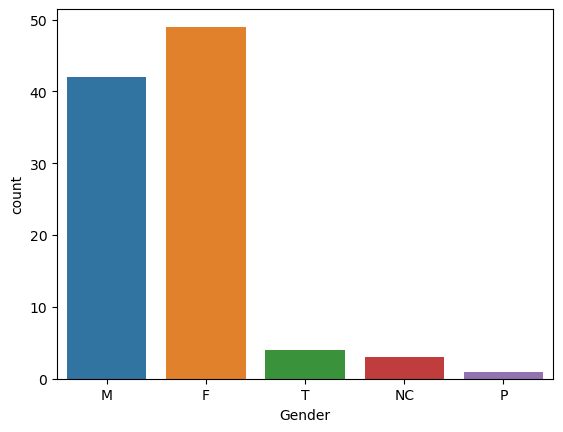

In [5]:
sns.countplot(x='Gender',data=df)
plt.show()
# 1.as we can see that we have all the type of gender in our dataset i.e Male ,Female ,transgender and etc 
# and max count if female and they are the one of the gender that do not return for the follow check up

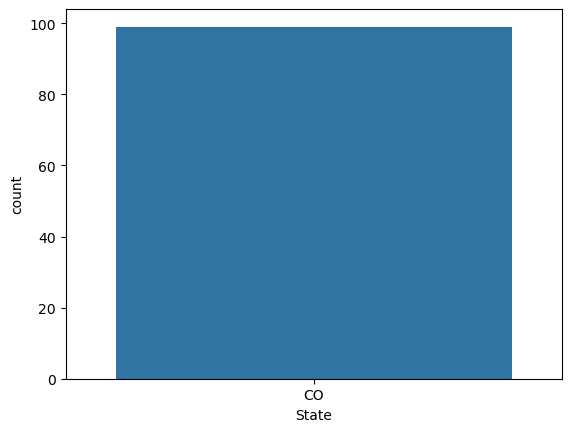

In [28]:
sns.countplot(x='State',data=df)
plt.show()

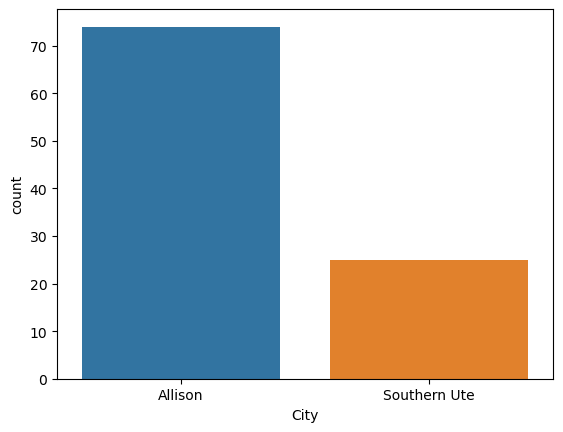

In [29]:
sns.countplot(x='City',data=df)
plt.show()

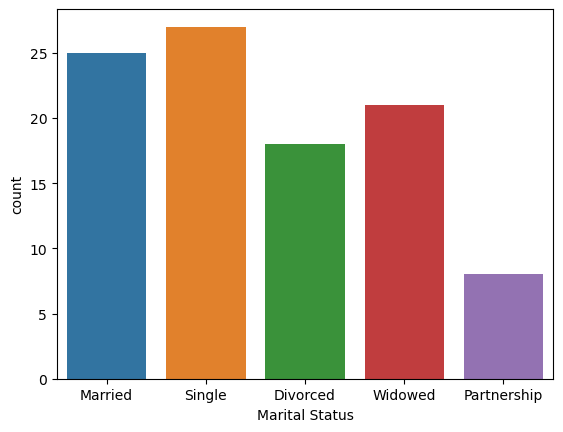

In [11]:
sns.countplot(x='Marital Status',data=df)
plt.show()
# 1.we can see that singles are the kind of people who are not returning back to the doctors for the further 
# check. there might be various reasons for this 
1. 

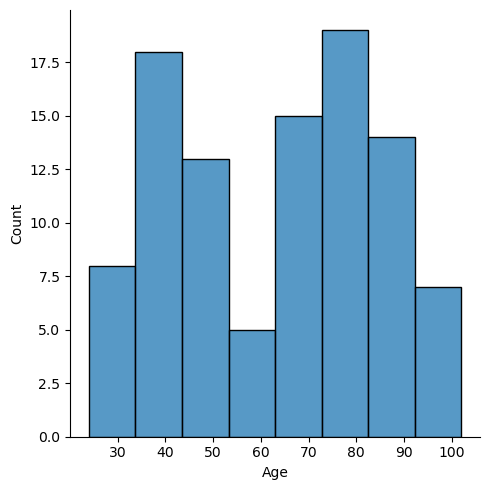

In [9]:
sns.displot(x='Age',data=df)
plt.show()

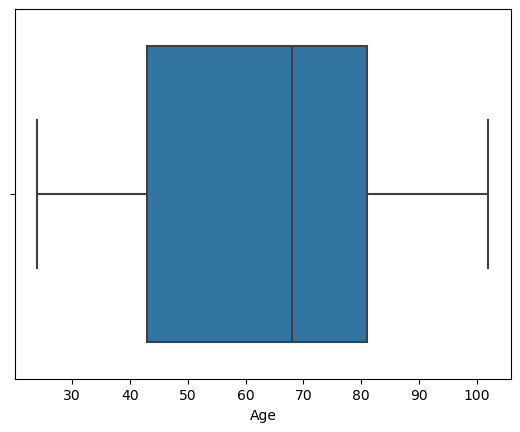

In [15]:
sns.boxplot(x='Age',data=df)
plt.show()
#there are no outliers present in our data

In [36]:
#Dropping the Use-less columns
df.drop(columns =['Patient ID', 'Zip Code'],inplace=True)

In [37]:
df.head()

,Gender,Marital Status,City,State,Age,Procedure,Follow_up
0,M,Married,Allison,CO,62,Extraction,Yes
1,F,Single,Allison,CO,94,Extraction,No
2,M,Divorced,Allison,CO,90,Extraction,No
3,F,Widowed,Allison,CO,81,Crown,No
4,F,Single,Allison,CO,45,Extraction,Yes


In [38]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Gender_M,Gender_NC,Gender_P,Gender_T,Marital Status_Married,Marital Status_Partnership,Marital Status_Single,Marital Status_Widowed,City_Southern Ute,Procedure_Emergency Surgery,Procedure_Extraction,Procedure_Implant,Procedure_Veneers,Follow_up_Yes
0,62,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1,94,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,90,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,81,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,45,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [41]:
# Spliting The Data 
x=df.drop('Follow_up_Yes',axis=1)
y=df['Follow_up_Yes']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((69, 14), (30, 14), (69,), (30,))

In [60]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_test_pred=Lr.predict(x_test)
y_train_pred=Lr.predict(x_train)

In [52]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_train,y_train_pred)

0.8260869565217391

In [63]:
accuracy_score(y_test,y_test_pred)

0.7333333333333333

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


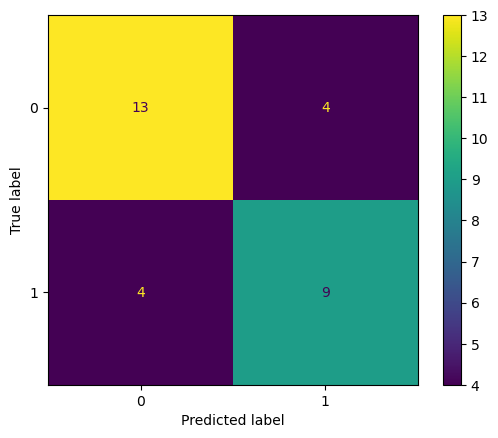

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Lr,x_test,y_test)

In [65]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Lr,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.85       0.8        0.6        0.85       0.78947368]
The mean Cross-Validation score is: 0.7778947368421052


C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


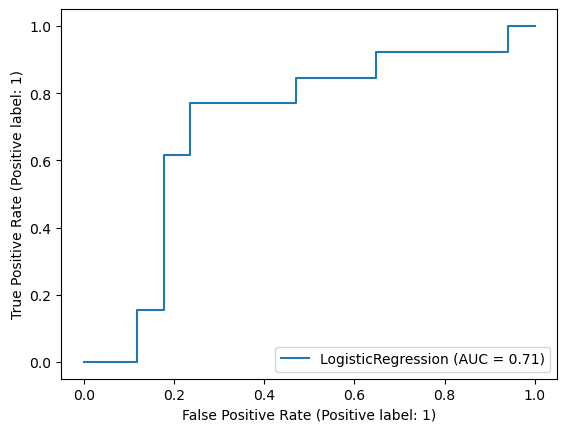

In [66]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Lr,x_test,y_test)